# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [6]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [7]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I booked our first out of c...
1,✅ Trip Verified | My husband and I booked seat...
2,"Not Verified | May 3, flew from Seattle to He..."
3,✅ Trip Verified | I went through three flights...
4,✅ Trip Verified | An excellent flight in Club ...


In [8]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [9]:
data = pd.read_csv("data/BA_reviews.csv", index_col=0)
data.head()

,reviews
0,✅ Trip Verified | I booked our first out of c...
1,✅ Trip Verified | My husband and I booked seat...
2,"Not Verified | May 3, flew from Seattle to He..."
3,✅ Trip Verified | I went through three flights...
4,✅ Trip Verified | An excellent flight in Club ...


In [10]:

data.reviews = data.reviews.str.split('|', expand = True)[1]

#DATA PROCESSING STEPS:
Cleaning text
Tokenization 
Enrichment - POS tagging
Removing stop words
obtaining stem words

In [11]:
data.head()

,reviews
0,I booked our first out of country trip to ta...
1,My husband and I booked seats within our prem...
2,"May 3, flew from Seattle to Heathrow then to..."
3,I went through three flights to reach my dest...
4,An excellent flight in Club World on British ...


In [12]:
import re
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

data['clean reviews'] = data['reviews'].apply(clean)
data.head()

,reviews,clean reviews
0,I booked our first out of country trip to ta...,I booked our first out of country trip to tak...
1,My husband and I booked seats within our prem...,My husband and I booked seats within our prem...
2,"May 3, flew from Seattle to Heathrow then to...",May flew from Seattle to Heathrow then to Edi...
3,I went through three flights to reach my dest...,I went through three flights to reach my dest...
4,An excellent flight in Club World on British ...,An excellent flight in Club World on British ...


In [13]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

from nltk import pos_tag

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to C:\Users\Kudzai
[nltk_data]     Prichard\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Kudzai
[nltk_data]     Prichard\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Kudzai
[nltk_data]     Prichard\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS Tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV }

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    new_list = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            new_list.append(tuple([word, pos_dict.get(tag[0])]))
    return new_list

[nltk_data] Downloading package omw-1.4 to C:\Users\Kudzai
[nltk_data]     Prichard\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Kudzai Prichard\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [15]:
data['POS tagged'] = data['clean reviews'].apply(token_stop_pos)

In [16]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew



In [17]:
data['lemma'] =  data['POS tagged'].apply(lemmatize)
data.head()

,reviews,clean reviews,POS tagged,lemma
0,I booked our first out of country trip to ta...,I booked our first out of country trip to tak...,"[(booked, v), (first, a), (country, n), (trip,...",book first country trip take husband surpris...
1,My husband and I booked seats within our prem...,My husband and I booked seats within our prem...,"[(husband, n), (booked, v), (seats, n), (withi...",husband book seat within premium economy boo...
2,"May 3, flew from Seattle to Heathrow then to...",May flew from Seattle to Heathrow then to Edi...,"[(May, n), (flew, v), (Seattle, n), (Heathrow,...",May fly Seattle Heathrow Edinburgh BA lose g...
3,I went through three flights to reach my dest...,I went through three flights to reach my dest...,"[(went, v), (three, None), (flights, n), (reac...",go three flight reach destination BA flight ...
4,An excellent flight in Club World on British ...,An excellent flight in Club World on British ...,"[(excellent, a), (flight, n), (Club, n), (Worl...",excellent flight Club World British Airways ...


In [18]:
data[['reviews','lemma']]

,reviews,lemma
0,I booked our first out of country trip to ta...,book first country trip take husband surpris...
1,My husband and I booked seats within our prem...,husband book seat within premium economy boo...
2,"May 3, flew from Seattle to Heathrow then to...",May fly Seattle Heathrow Edinburgh BA lose g...
3,I went through three flights to reach my dest...,go three flight reach destination BA flight ...
4,An excellent flight in Club World on British ...,excellent flight Club World British Airways ...
...,...,...
995,London Heathrow to Murcia and back. A few pr...,London Heathrow Murcia back problem Heathrow...
996,London to Amsterdam. BA's service has gone n...,London Amsterdam BA service go notably downh...
997,Aberdeen to Abu Dhabi via London. Despite be...,Aberdeen Abu Dhabi via London Despite Gold M...
998,Prague to Denver via London. I almost missed...,Prague Denver via London almost miss flight ...


In [19]:
%pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [22]:
from  vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment_analysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [24]:
data['Sentiment'] = data['lemma'].apply(vader_sentiment_analysis)
data['Analysis'] = data['Sentiment'].apply(vader_analysis)
data.head()

,reviews,clean reviews,POS tagged,lemma,Sentiment,Analysis
0,I booked our first out of country trip to ta...,I booked our first out of country trip to tak...,"[(booked, v), (first, a), (country, n), (trip,...",book first country trip take husband surpris...,0.8720,Positive
1,My husband and I booked seats within our prem...,My husband and I booked seats within our prem...,"[(husband, n), (booked, v), (seats, n), (withi...",husband book seat within premium economy boo...,-0.8442,Negative
2,"May 3, flew from Seattle to Heathrow then to...",May flew from Seattle to Heathrow then to Edi...,"[(May, n), (flew, v), (Seattle, n), (Heathrow,...",May fly Seattle Heathrow Edinburgh BA lose g...,-0.7717,Negative
3,I went through three flights to reach my dest...,I went through three flights to reach my dest...,"[(went, v), (three, None), (flights, n), (reac...",go three flight reach destination BA flight ...,-0.4767,Negative
4,An excellent flight in Club World on British ...,An excellent flight in Club World on British ...,"[(excellent, a), (flight, n), (Club, n), (Worl...",excellent flight Club World British Airways ...,0.9899,Positive


In [26]:
vader_count = data['Analysis'].value_counts()
vader_count

Positive    514
Negative    380
Neutral     106
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x1f6f60b2170>,
 [Text(-0.04836492521093929, 1.0989362283632933, 'Positive'),
  Text(-0.3135212139886837, -1.0543739604044962, 'Negative'),
  Text(1.2758351325693755, -0.44129889474332934, 'Neutral')],
 [Text(-0.026380868296875973, 0.5994197609254327, '51.4%'),
  Text(-0.17101157126655475, -0.5751130693115433, '38.0%'),
  Text(0.8033036019881252, -0.2778548596532074, '10.6%')])

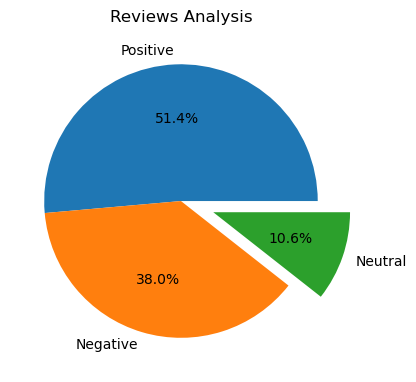

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_count.values, labels = vader_count.index, explode = (0, 0, 0.25), autopct = '%1.1f%%', shadow=False )


In [34]:
%pip install waterfallcharts
%pip install waterfall-ax
import waterfall_chart
from waterfall_ax import WaterfallChart
import plotly.graph_objects as go


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3395 sha256=f591561305182dd709671aec396d32ddc94ed253475801791bdacaf523ddbb92
  Stored in directory: c:\users\kudzai prichard\appdata\local\pip\cache\wheels\bb\d9\81\e38982fda52e959cda08d83dc3982f91679a8d7e01f60ca4d9
Successfully built waterfallcharts
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [52]:
%pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color = "white",
        stopwords = stopwords,
        max_words = 100,
        max_font_size = 30,
        scale = 3,
        random_state = 1
    )
    
    wordcloud = wordcloud.generate(str(data))
    
    fig= plt.figure(1, figsize=(12,12))
    plt.axis('off')
    
    plt.imshow(wordcloud)
    plt.show()

Note: you may need to restart the kernel to use updated packages.


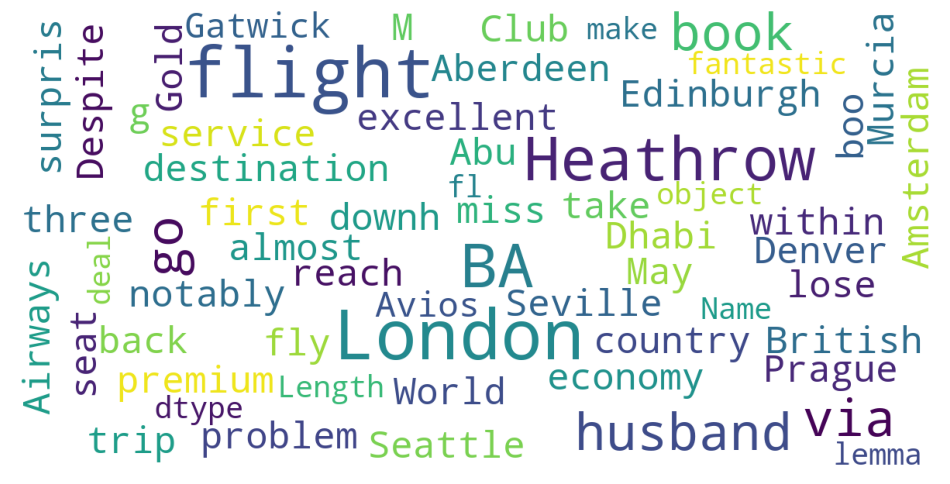

In [53]:
show_wordcloud(data.lemma)

In [ ]:
data.to_csv("data/BA_reviews_analyzed.csv")